importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

reading data from csv

In [3]:
data=pd.read_csv(r'C:\Users\anura\Downloads\stresssss\WESAD (Raw and Processed)\dataset\2. final\datasets\hrv\wesad\combined\classification\wesad-chest-combined-classification-hrv.csv')
test=pd.read_csv(r'C:\Users\anura\Downloads\stresssss\WESAD (Raw and Processed)\dataset\2. final\datasets\hrv\wesad\combined\classification\wesad-classification-hrv-validation-dataset.csv')

In [4]:
test.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,836.287509,836.542330,74.347097,18.992200,18.990146,3.914612,72.328641,20.25,0.25,13.444920,...,3.929834e+06,0.057583,0.039940,4.192356,0.010687,11,baseline,low,0,0
1,885.066916,888.885335,54.149345,10.603410,10.602391,5.106786,68.058181,2.00,0.00,7.506435,...,5.925739e+06,0.150989,0.134839,12.918568,0.007719,6,baseline,medium,1,0
2,617.957952,611.532195,62.909515,11.314677,11.314522,5.559992,98.041651,3.25,0.25,8.010620,...,6.120832e+06,0.079972,0.088488,3.443774,0.017516,13,stress,medium,1,2
3,590.628007,578.585925,51.127837,13.373595,13.370766,3.823043,102.292102,7.25,0.75,9.466430,...,1.819001e+06,0.056556,0.080706,1.164296,0.243491,17,stress,medium,1,2
4,705.684374,702.068590,46.416132,9.503709,9.494806,4.884002,85.390357,2.75,0.00,6.722271,...,1.128313e+06,0.132048,0.172682,2.749117,0.066276,13,baseline,medium,1,0


In [5]:
data.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,baseline,medium,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,baseline,low,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,amusement,medium,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,stress,low,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,stress,medium,1,2


In [6]:
test.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,SSSQ Label,condition label
count,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,...,1.356500e+04,13565.000000,1.356500e+04,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000
mean,786.718143,784.966582,71.124869,14.352597,14.349317,5.232165,80.362350,10.326852,1.008809,10.159238,...,1.329781e+00,8.913462,-2.348058e+06,0.166309,0.212377,8.157914,0.042486,9.440988,0.872392,0.771250
std,155.478526,159.571871,32.606737,6.069543,6.069041,1.771557,17.881308,10.732644,1.819669,4.296848,...,5.163260e+00,0.955308,2.711478e+08,0.213175,0.496134,13.719796,0.084921,4.709694,0.777907,0.884564
min,411.078362,411.966595,13.786706,2.297290,2.293909,1.894529,48.227524,0.000000,0.000000,1.624075,...,5.422143e-08,6.944604,-1.399723e+10,0.021551,0.008299,0.301723,0.000013,2.000000,0.000000,0.000000
25%,694.610230,687.696190,51.733591,9.552529,9.551541,4.023288,68.483436,2.000000,0.000000,6.762439,...,6.183810e-02,8.275472,-3.615142e+06,0.074520,0.048675,2.194448,0.005573,5.000000,0.000000,0.000000
50%,795.342707,795.362000,65.212994,13.627897,13.627897,5.024565,76.217835,6.500000,0.000000,9.648477,...,2.508121e-01,8.730283,-9.468871e+05,0.111409,0.092495,4.113742,0.014662,9.000000,1.000000,0.000000
75%,885.026973,890.737085,86.433890,18.072109,18.069190,5.979176,87.086988,15.250000,1.250000,12.792888,...,7.103988e-01,9.332041,3.244919e+06,0.183800,0.204744,8.455479,0.043702,14.000000,1.000000,2.000000
max,1341.032784,1181.686350,417.129749,34.854644,34.853794,22.172828,146.188120,46.750000,11.500000,24.676296,...,2.408444e+02,12.090828,1.385782e+10,4.771071,9.698384,383.380460,1.126750,17.000000,2.000000,2.000000


In [7]:
data.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,SSSQ Label,condition label
count,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,...,1.356500e+05,135650.000000,1.356500e+05,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000
mean,788.515184,786.845673,71.453748,14.379418,14.376136,5.247878,80.203812,10.396622,1.026915,10.178226,...,1.357090e+00,8.904329,-1.761317e+06,0.166589,0.210475,8.309048,0.041303,9.398349,0.875245,0.773727
std,156.334847,160.113990,33.646350,6.134973,6.134411,1.792526,17.913204,10.857041,1.865541,4.343130,...,5.323943e+00,0.957470,1.070482e+09,0.207166,0.469279,14.892431,0.081219,4.709621,0.780052,0.882485
min,411.068840,411.966595,13.786706,2.294390,2.292144,1.887603,48.183943,0.000000,0.000000,1.622825,...,3.871992e-10,6.941465,-3.426834e+11,0.021295,0.008200,0.294702,0.000009,2.000000,0.000000,0.000000
25%,695.450860,689.389645,51.839395,9.579017,9.576334,4.025865,68.227916,2.000000,0.000000,6.779992,...,6.322669e-02,8.260019,-3.607337e+06,0.073939,0.048338,2.251744,0.005567,5.000000,0.000000,0.000000
50%,798.200622,797.564400,65.238376,13.578235,13.576345,5.028439,75.988575,6.500000,0.000000,9.611978,...,2.536286e-01,8.717143,-9.391674e+05,0.111455,0.092320,4.213662,0.014356,9.000000,1.000000,0.000000
75%,888.053029,892.774831,86.848219,18.170919,18.165098,6.001586,86.975168,15.500000,1.250000,12.860790,...,7.131422e-01,9.326048,3.286467e+06,0.184950,0.203164,8.530982,0.042999,14.000000,1.000000,2.000000
max,1341.611513,1181.686350,418.066612,34.881131,34.880732,22.194700,146.191044,46.750000,11.500000,24.695368,...,2.459810e+02,12.090949,1.092115e+11,4.771071,9.714187,537.538316,1.129262,17.000000,2.000000,2.000000


dividing data into X and Y variables

In [8]:
X=test.drop(['condition','SSSQ class','SSSQ Label','condition label','subject id'],axis='columns')
Y=["condition"]
Y=test[Y]

In [9]:
x=data.drop(['condition','SSSQ class','SSSQ Label','condition label','subject id'],axis='columns')
y=["condition"]
y=data[y]

Applyiing MinMaxScaler to normalaise the data

In [10]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
X= scaler.fit_transform(X,Y)

converting qualitative data into qualtitaive data

In [11]:

la=LabelEncoder()
y=la.fit_transform(y)
Y=la.fit_transform(Y)

c:\Users\anura\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anura\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature selection using PCA and decompostion


In [12]:
from sklearn.decomposition import PCA
# x=SelectKBest(f_classif,k=20).fit_transform(x,y)
x=PCA(n_components=20).fit_transform(x)
X=PCA(n_components=20).fit_transform(X)

spliting into training and testing data 

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

SVM

In [14]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [15]:
ypred=clf.predict(x_test)
Y_SVM=clf.predict(X)

In [16]:
print('validation accuracy',accuracy_score(Y,Y_SVM))
print('validation f1 score:',f1_score(Y,Y_SVM,average='macro'))
print('validation precision score',precision_score(Y,Y_SVM,average='macro'))
print('validation recall score:',recall_score(Y,Y_SVM,average='macro'))
print('accuracy:', accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy 0.9597493549576115
validation f1 score: 0.9499091630176985
validation precision score 0.948731812933341
validation recall score: 0.9511066127411899
accuracy: 0.9826910034500044
f1 score: 0.9786568509426691
precision score 0.9851321686001709
recall score: 0.9727908487541508


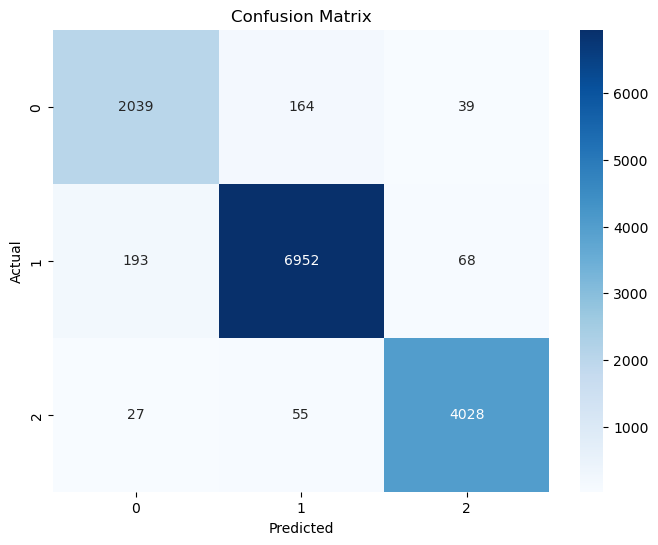

In [44]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_SVM)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


logistics Regression

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(x_train, y_train)
ypred=clf.predict(x_test)
Y_LoR=clf.predict(X)


In [18]:
print('validation accuracy:', accuracy_score(Y,Y_LoR))
print('validation f1 score:',f1_score(Y,Y_LoR,average='macro'))
print('validation precision score',precision_score(Y,Y_LoR,average='macro'))
print('validation recall score:',recall_score(Y,Y_LoR,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.7826760044231478
validation f1 score: 0.709422689655688
validation precision score 0.7510511093208275
validation recall score: 0.6961259363990854
accuracy: 0.7840651077757792
f1 score: 0.71114926019101
precision score 0.7633885248009246
recall score: 0.6948810882435209


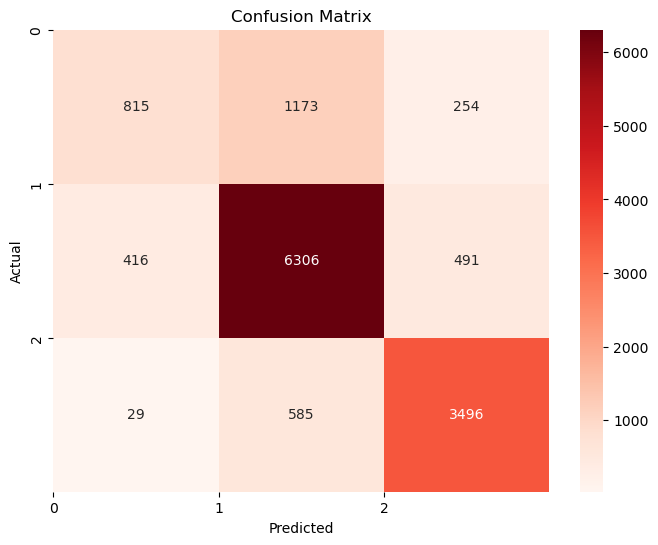

In [19]:
# Get the unique class labels from y_test and ypred
classes = np.unique(np.concatenate((Y, Y_LoR)))

# Create the confusion matrix
cm = confusion_matrix(Y, Y_LoR)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.title('Confusion Matrix')
plt.show()


accuracy of logistic regression is 75.1216 %

Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50,min_samples_split=2).fit(x_train,y_train)
ypred=clf.predict(x_test)
Y_RF=clf.predict(X)

In [21]:
print('validation accuracy:',accuracy_score(Y,Y_RF))
print('validation f1 score:',f1_score(Y,Y_RF,average='macro'))
print('validation precision score',precision_score(Y,Y_RF,average='macro'))
print('validation recall score:',recall_score(Y,Y_RF,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.973534832288979
validation f1 score: 0.9655785015422592
validation precision score 0.978078272519452
validation recall score: 0.9548323552310171
accuracy: 0.9999705127827087
f1 score: 0.9999744226389495
precision score 0.9999813613658391
recall score: 0.9999674860189881


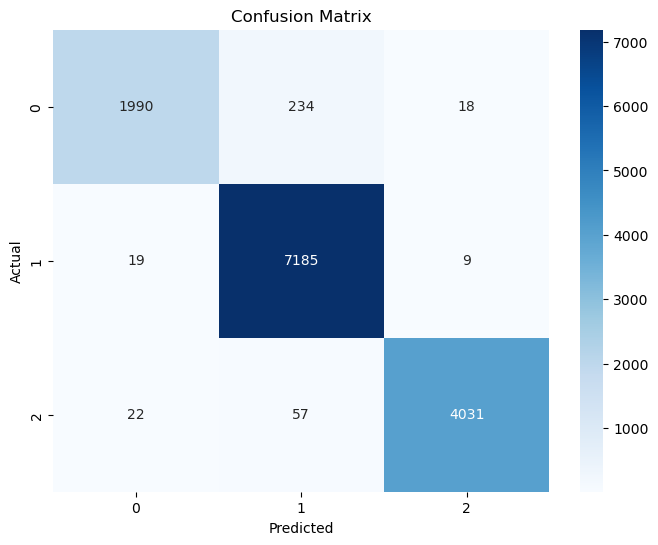

In [22]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_RF)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


accuracy of Random forest is 99.9823 %

K-Nearest-neighbour


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)
Y_KNN=knn.predict(X)

In [24]:
print('validation accuracy:',accuracy_score(Y,Y_KNN))
print('validation f1 score:',f1_score(Y,Y_KNN,average='macro'))
print('validation precision score',precision_score(Y,Y_KNN,average='macro'))
print('validation recall score:',recall_score(Y,Y_KNN,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.9998525617397714
validation f1 score: 0.9998726708108757
validation precision score 0.9999075999075999
validation recall score: 0.9998377939983779
accuracy: 0.9999705127827087
f1 score: 0.9999618328816161
precision score 0.9999813613658391
recall score: 0.9999423099111572


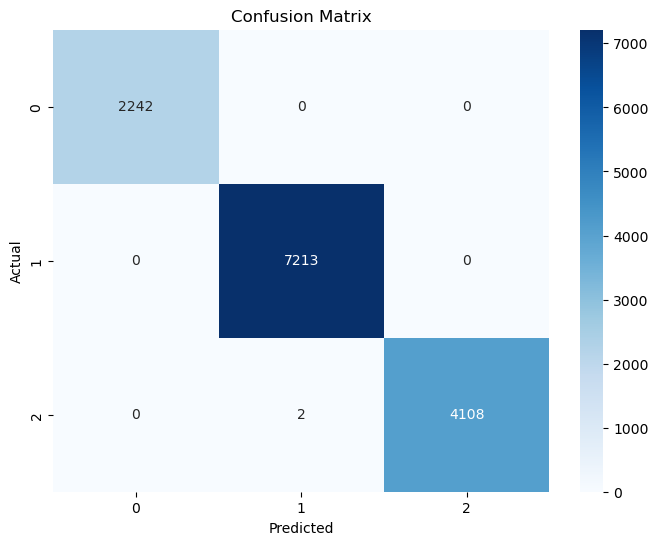

In [25]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_KNN)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy of K-Nearest-neighbour is 99.9557 %

Naives Bayes    


In [26]:
clf1 = GaussianNB()
clf1.fit(x_train, y_train)
ypred=clf1.predict(x_test)
Y_NB=clf1.predict(X)

In [27]:
print('validation accuracy:',accuracy_score(Y,Y_NB))
print('validation f1 score:',f1_score(Y,Y_NB,average='macro'))
print('validation precision score',precision_score(Y,Y_NB,average='macro'))
print('validation recall score:',recall_score(Y,Y_NB,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.6589015849612975
validation f1 score: 0.5678847862321007
validation precision score 0.6152832121725943
validation recall score: 0.5521293710356759
accuracy: 0.6781470232654144
f1 score: 0.5791494263726774
precision score 0.644762982384453
recall score: 0.5624816815938501


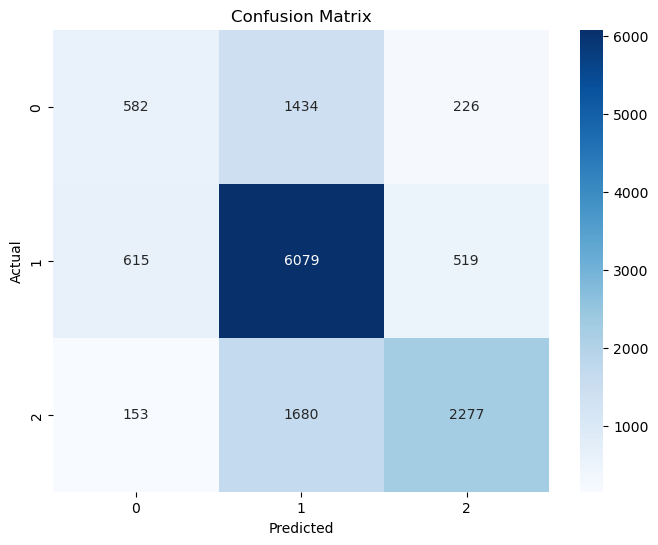

In [28]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_NB)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [29]:
clf4 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
clf4.fit(x_train, y_train)
ypred=clf4.predict(x_test)
Y_DF=clf4.predict(X)

In [30]:
print('validation accuracy:',accuracy_score(Y,Y_DF))
print('validation f1 score:',f1_score(Y,Y_DF,average='macro'))
print('validation precision score',precision_score(Y,Y_DF,average='macro'))
print('validation recall score:',recall_score(Y,Y_DF,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.898341319572429
validation f1 score: 0.8776486139515294
validation precision score 0.8789874895990195
validation recall score: 0.8769266890144166
accuracy: 0.9943679414973609
f1 score: 0.9933469582302538
precision score 0.9936522141675791
recall score: 0.9930428988154918


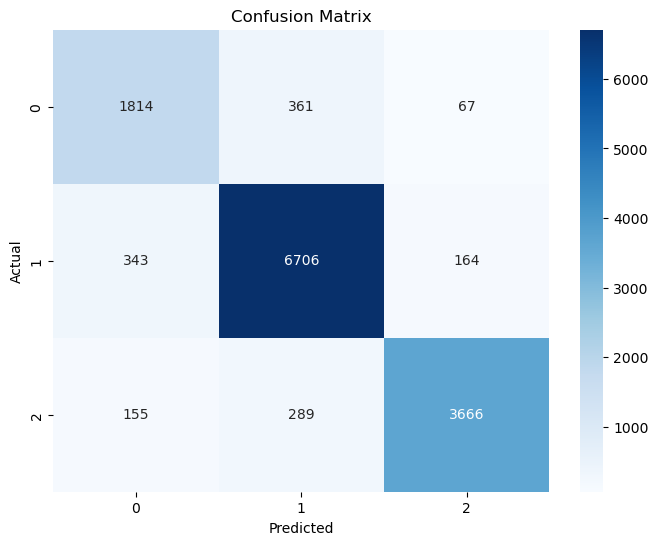

In [31]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_DF)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Bagging 


In [32]:
bgcl_model = BaggingClassifier(estimator=clf4, n_estimators=50,random_state=1)
bgcl_model.fit(x_train, y_train)
ypred=bgcl_model.predict(x_test)
Y_bag=bgcl_model.predict(X)

In [33]:
print('validation accuracy:',accuracy_score(Y,Y_bag))
print('validation f1 score:',f1_score(Y,Y_bag,average='macro'))
print('validation precision score',precision_score(Y,Y_bag,average='macro'))
print('validation recall score:',recall_score(Y,Y_bag,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.9515665315149281
validation f1 score: 0.9423356303257856
validation precision score 0.9437638291130277
validation recall score: 0.940942186383792
accuracy: 0.9994987173060478
f1 score: 0.9994254487454556
precision score 0.9994046659163329
recall score: 0.9994462505250139


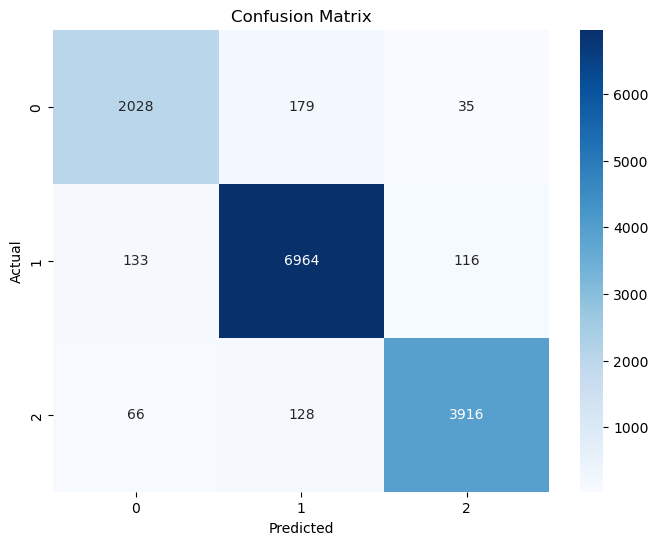

In [34]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_bag)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Boosting 
Ada Boosting

In [35]:
abcl_model = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl_model.fit(x_train,y_train)
ypred=abcl_model.predict(x_test)
Y_ada=abcl_model.predict(X)

In [36]:
print('validation accuracy:',accuracy_score(Y,Y_ada))
print('validation f1 score:',f1_score(Y,Y_ada,average='macro'))
print('validation precision score',precision_score(Y,Y_ada,average='macro'))
print('validation recall score:',recall_score(Y,Y_ada,average='macro'))
print('accuracy:',accuracy_score(y_test,ypred))
print('f1 score:',f1_score(y_test,ypred,average='macro'))
print('precision score',precision_score(y_test,ypred,average='macro'))
print('recall score:',recall_score(y_test,ypred,average='macro'))

validation accuracy: 0.7002580169553999
validation f1 score: 0.548885087370271
validation precision score 0.6312741057931351
validation recall score: 0.5556771089660547
accuracy: 0.7027393624863622
f1 score: 0.5520579408986835
precision score 0.6446992508936015
recall score: 0.5620575313586841


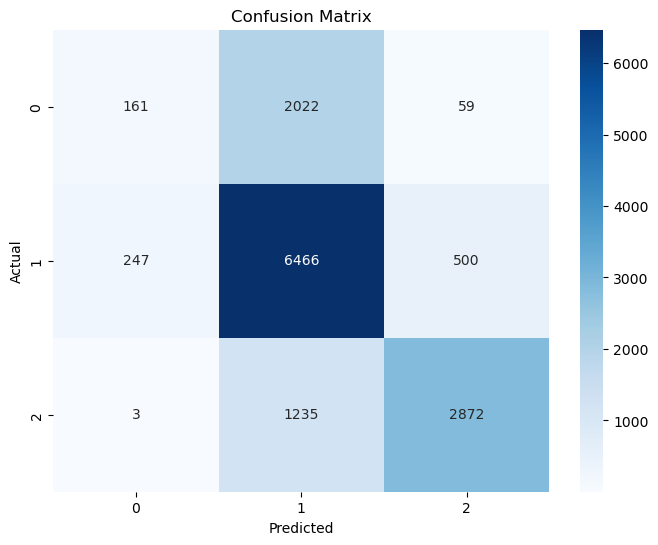

In [37]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(Y,Y_ada)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

artificial neural network


In [38]:
from keras.callbacks import Callback



class Metrics(Callback):
    

    def on_train_begin(self, logs={}):
        
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.model.validation_data[0]))).round()
        val_targ = self.model.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall _val_recall")
        return


metrics = Metrics()

In [39]:



# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.validation_data=(x_test, y_test)

# Compile the model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# # Train the model
# history=model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.2, )



In [40]:
# # Evaluate the model on the test set
# loss, accuracy = model.evaluate(x_test, y_test)
# print('Test loss:', loss)
# print('Test accuracy:', accuracy)

In [41]:
# # Get training and validation accuracy values
# training_acc = history.history['accuracy']
# validation_acc = history.history['val_accuracy']

# # validation_acc = history.history['val_accuracy']
# epochs = range(1, len(training_acc) + 1)

# # Create a plot with enhanced visual elements
# plt.figure(figsize=(8, 4))
# plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
# plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
# plt.title('Model Accuracy', fontsize=16)
# plt.xlabel('Epoch', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()

# # Display the plot
# plt.show()

accuracy of ANN is 92.21%

In [42]:
# import tensorflow as tf


# # Define the model architecture
# model = tf.keras.Sequential([
#     tf.keras.layers.Reshape((30, 1), input_shape=(30,)),
#     tf.keras.layers.Conv1D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history=model.fit(x_train, y_train, epochs=25, batch_size=16)



In [43]:
# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')